# Machine Learning em Python

In [1]:
import sklearn as sl
sl.__version__

'0.23.2'

Dataset: Prima Indians Diabetes Data Set https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes
        
Este dataset descreve os registros médicos entre pacientes do Pima Inidians e cada registro está marcado se o paciente desenvolveu ou não diabetes.

### Informações sobre os atributos:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

### Extraindo e Carregando os Dados

Existem diversas considerações ao se carregar dados para o processo de Machine Learning. Por exemplo: seus dados possuem um header (cabeçalho)? Caso negativo, você vai precisar definir o título para cada coluna. Seus arquivos possuem comentários? Qual o delimitador das colunas? Alguns dados estão entre aspas, simples ou duplas?

In [2]:
# Carregando arquivo csv usando Numpy
import numpy as np
arquivo = './data/pima-data.csv'
arquvio_data = open(arquivo, 'rb')
dados = np.loadtxt(arquvio_data, delimiter=',')
print(dados.shape)

(768, 9)


In [3]:
# Carregando arquvio csv usando Pandas
import pandas as pd
arquivo = './data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = pd.read_csv(arquivo, names=colunas)
print(dados.shape)

(768, 9)


In [4]:
# Método recomendado
from pandas import read_csv
arquivo = './data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names=colunas)
print(dados.shape)

(768, 9)


## Análise Exploratória de Dados

### Estatística Descritiva

In [5]:
# Visualizando as primeiras 20 linhas
dados.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Se o número de linhas no seu arquivo for muito grande, o algoritmo pode levar muito tempo para ser treinado. Se o número de registros for muito pequeno, você pode não ter registros suficientes para treinar seu modelo.

Se você tiver muitas colunas em seu arquivo, o algoritmo pode apresentar problemas de performance devido a alta dimensionalidade.

A melhor solução vai depender de cada caso. Mas lembre-se: treine seu modelo em um subset do seu conjunto maior de dados e depois aplique o modelo no Big Data.

In [6]:
# Visualizando as dimensões
dados.shape

(768, 9)

O tipo de dados é muito importante. Pode ser necessário converter strings ou colunas com números inteiros podem representar variáveis categóricas ou valores ordinários

In [7]:
# Tipo de dados de cada atributo
dados.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [8]:
# Sumário estatístico
dados.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Em problemas de classificação pode ser necessário balancear as classes. Classes desbalanceadas (ou seja, volume maior de um dos tipos das classes) são comuns e precisam ser tratadas durante a fase de pré-processamento. Podemos ver abixo que existe clara desproporção entre as classes 0 (não ocorrência de diabetes) e 1 (ocorrência de diabetes).

In [9]:
# Distribuição das classes
dados.groupby('class').size()

class
0    500
1    268
dtype: int64

A correlação é o relacionamento entre 2 variáveis. O método mais comum para clcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão logística podem apresentar problemas de performance se houverem atributos altamente correlacionados (colineares).

In [10]:
# Correlação de Pearson
dados.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Skew (ou simetria) se refere a distribuição de dados que assumida ser normal ou gaussiana (bell curve). Muitos algoritmos de Machine Learning consideram que os dados possuem uma distrubuição normal. Conhecendo a simetria dos dados, permite que você faça uma preparação e entregue o que o algoritmo espera receber, aumentando desta forma a acurácia do modelo preditivo.

In [11]:
# Verificando o skew de cada atributo
dados.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

### Visualização com Matplotlib

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Com o histrograma podemos rapidamente avaliar a distribuição de cada atributo. Os histograma agrupam os dados em bins e fornecem uma contagem do número de observações em cada bin. Como o histograma, você pode rapidamente verificar a simetria dos dados e se eles estão em distribuição normal ou não.
Isso também vai ajudar na identificação dos outliers.

Podemos ver que os atributos age, pedi e test possuem uma distribuição exponencial. Podemos ver que as colunas mass e press possuem uma distribuição normal.

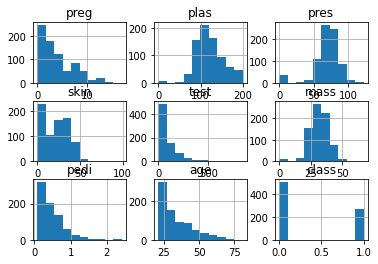

In [13]:
# Histograma Univariado
dados.hist()
plt.show()

Os Density Plots são outra forma de visualizar a distribuição dos dados para cada atributo. O plot é como uma espécie de histograma abstrato com uma curva suave através do topo dos bins de um histograma. Pode ser mais fácil identificar a distribuição dos dados usando um density plot.

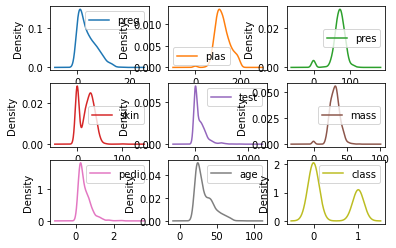

In [14]:
# Density Plot Univariado
dados.plot(kind = 'density', subplots = True, layout = (3, 3), sharex = False)
plt.show()

Com os boxplots também podemos revisar a distribuição dos dados para cada atributo. A linha no centro é o valor da mediana (quartil 50%), a linha abaixo é o quartil 25% e a linha acima é o quartil 75%. O boxplot ajuda a ter uma ideia da dispersão dos dados e os possíveis outliers.

Podemos ver que a dispersão dos dados é bem diferente entre os atributos. As colunas age, skin e test possuem uma simetria muito próxima a valores de dados menores.

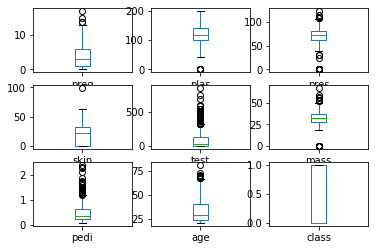

In [15]:
# Box and Whisker Plots
dados.plot(kind = 'box', subplots = True, layout = (3, 3), sharex = False, sharey = False)
plt.show()

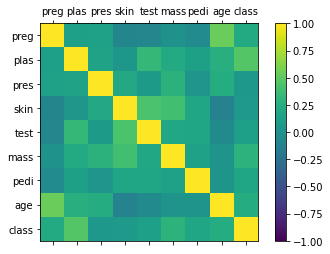

In [16]:
# Matriz de Correlação com nomes das variáveis
correlations = dados.corr()

# Plot
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

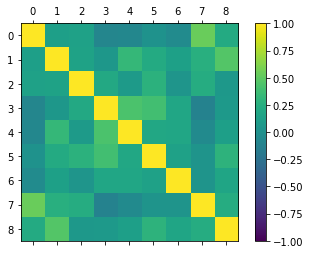

In [17]:
# Matriz de Correlação genérica
correlations = dados.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

Um scatterplot mostra o relacionamento entre duas variáveis como pontos em duas dimensões, sendo um eixo para cada variável. Podemos criar um scatterplot para cada par de variáveis em nosso dataset. A exemplos da matriz de correlação, o scatterplot matrix é simétrico.

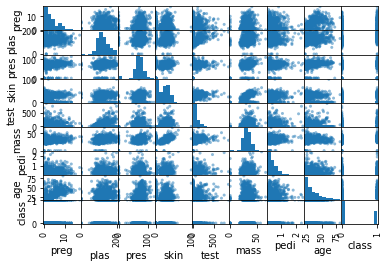

In [18]:
# Scatter Plot
from pandas.plotting import scatter_matrix
scatter_matrix(dados)
plt.show()

### Visualização com Seaborn

In [19]:
import seaborn as sns

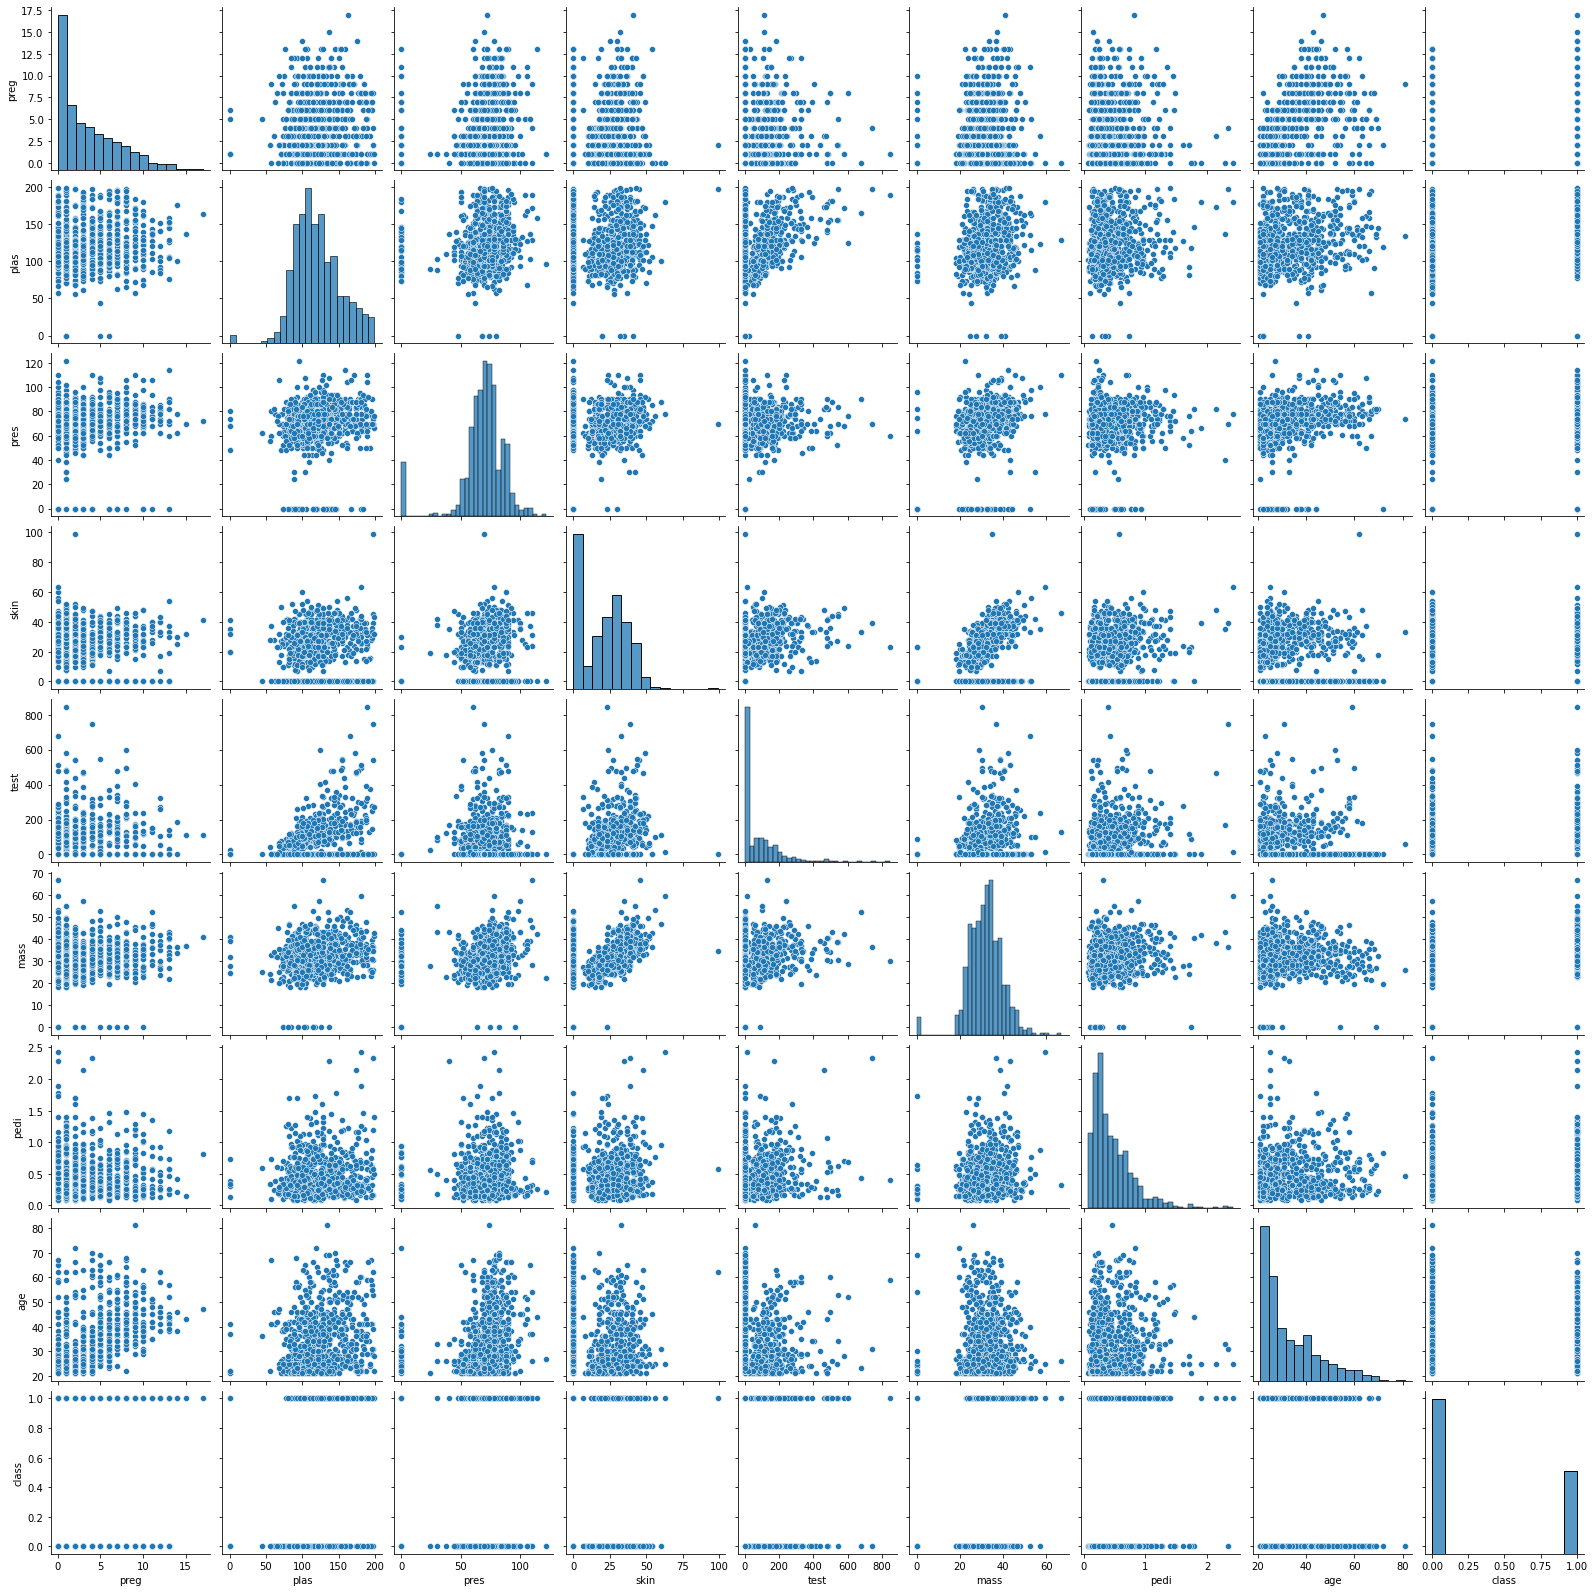

In [20]:
# Pairplot
sns.pairplot(dados)

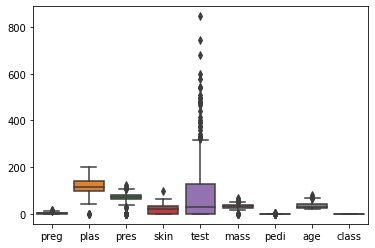

In [21]:
# Boxplot com orientação vertical
sns.boxplot(data = dados, orient = "v")

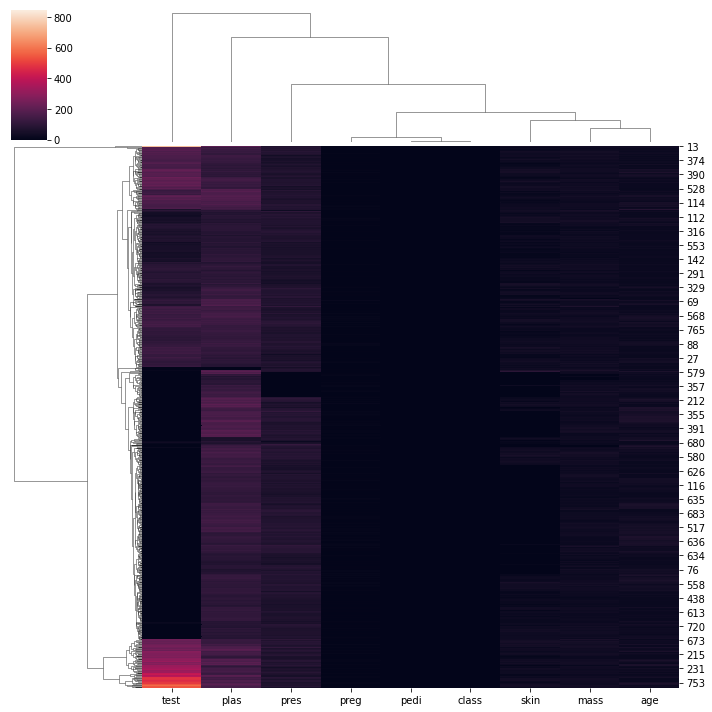

In [22]:
# Clustermap
sns.clustermap(data = dados)

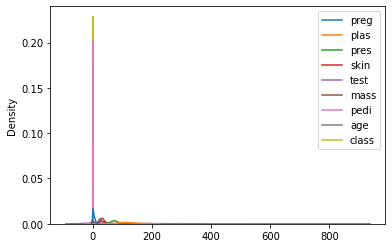

In [23]:
# kdeplot
sns.kdeplot(data = dados)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3486: RuntimeWarning: invalid value encountered in double_scalars
  Cinv = sc.gamma(a)*sc.gamma(b)/sc.gamma(a+b)*sc.hyp2f1(c, a, a+b, -z)
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3487: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


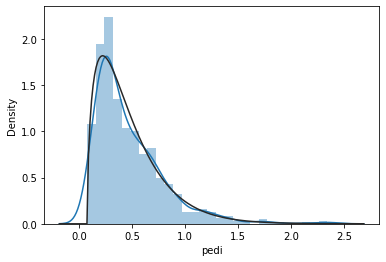

In [24]:
from scipy import stats
sns.distplot(dados.pedi, fit = stats.gausshyper)

## Preparando os Dados para Machine Learning

Muitos algoritmos esperam receber os dados em um formato específico. É seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que você está utilizando.

É muito provável que você tenha que realizar tarefas de pré-processamento nos dados. Esse é um passo necessário dentro do processo. O desafio é o fato que cada algoritmo requer uma estrutura diferente, o que pode requerer transformações diferentes nos dados. Mas é possível em alguns casos, obter bons resultados sem um trabalho de pré-processamento. Mas é uma prática criar diferentes visões e transformações dos dados, de modo a poder testar diferentes algoritmos de Machine Learning.

### Escala

E uma das primeiras tarefas do pré-processamento, é colocar seus dados na mesma escala. Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com range entre 0 e 1. Isso é útil para a otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como o KNN. O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler()

In [25]:
# Transformando os dados para a mesma escala (entre 0 e 1)
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

# Carregando os dados
dataset = './data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(dataset, names=colunas)

array = df.values

# Separando o array em componentes de input e output (array[linhas, colunas])
X = array[:, :8] # Todas as linhas e somente até a coluna de indice 8
Y = array[:,  8] # Todas as linhas e somente a coluna de indice 8

# Gerando a nova escala
scaler = MinMaxScaler(feature_range = (0, 1))
rescalerX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print(rescalerX[0:5, :])

[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


### Padronização

Padronização é a técnica para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrões em uma distribuição Gaussiana com a média igual a 0 e desvio padrão igual a 1. Isso é útil para algoritmos que esperam que os dados estejam com uma distribuição Gaussiana, como regressão linear, regressão logística e linear discriminant analysis. Funciona bem quando o dados já estão na mesma escala. O sickit-learn possui uma função para esta estapa, chamada StandardScaler().

In [26]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão)
from pandas import read_csv
from sklearn.preprocessing import StandardScaler

# Carregando os dados
dataset = './data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(dataset, names=colunas)
array = df.values

# Separando o array em componentes de input e output (array[linhas, colunas])
X = array[:, :8] # Todas as linhas e somente até a coluna de indice 8
Y = array[:,  8] # Todas as linhas e somente a coluna de indice 8

# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

# Sumarizando os dados transformados
print(standardX[0:5, :])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


### Normalização

No scikit-learn, normalização se refere a ajustar a escala de cada observação (linha) de modo que ela tenha comprimento igual a 1 (chamado vetor de comprimento 1 em álgebra linear). Este método de pré-processamento é útil quando temos dataset esparsos (com muitos zeros) e atributos com escala muito variada. Útil quando usamos algoritmos de redes neurais ou que usam medida de distância como KNN. O scikit-learn possui uma função para esta etapa, chamada Normalizer().

In [27]:
# Normalizando os dados (comprimento igual a 1)
from pandas import read_csv
from sklearn.preprocessing import Normalizer

# Carregando os dados
dataset = './data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(dataset, names=colunas)
array = df.values

# Separando o array em componentes de input e output (array[linhas, colunas])
X = array[:, :8] # Todas as linhas e somente até a coluna de indice 8
Y = array[:,  8] # Todas as linhas e somente a coluna de indice 8

# Gerando o novo padrão
normalizer = Normalizer().fit(X)
normalizedX = normalizer.transform(X)

# Sumarizando os dados transformados
print(normalizedX[0:5, :])


[[0.03355237 0.82762513 0.40262844 0.19572216 0.         0.18789327
  0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 0.24429612 0.         0.22407851
  0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 0.         0.         0.11765825
  0.00339341 0.16159073]
 [0.00661199 0.58846737 0.43639153 0.15207584 0.62152733 0.185797
  0.0011042  0.13885185]
 [0.         0.5963863  0.17412739 0.15236146 0.73133502 0.18762226
  0.00996009 0.14365509]]


### Transformar os Dados em Valores Binários (Binarizing)

Nós podemos definir um valor em nossos dados, ao qual chamamos de threshold e então definimos que todos os valores acima do threshold serão marcados como sendo 1 e todos valores iguais ou abaixo do threshold serão marcados como 0. Isso é o que chamamos de Binarizing. Isso é útil quando temos probabilidade e queremos transformar os dados em algo com mais significado. O scikit-learn possui uma função para esta etapa, chamada Binarizer().

In [28]:
# Binarização
from pandas import read_csv
from sklearn.preprocessing import Binarizer

# Carregando os dados
dataset = './data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(dataset, names=colunas)
array = df.values

# Separando o array em componentes de input e output (array[linhas, colunas])
X = array[:, :8] # Todas as linhas e somente até a coluna de indice 8
Y = array[:,  8] # Todas as linhas e somente a coluna de indice 8

# Gerando o novo padrão
binarizer = Binarizer(threshold = 0.0).fit(X)
normalizedX = binarizer.transform(X)

# Sumarizando os dados transformados
print(normalizedX[0:5, :])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]
